## Fashion MNIST

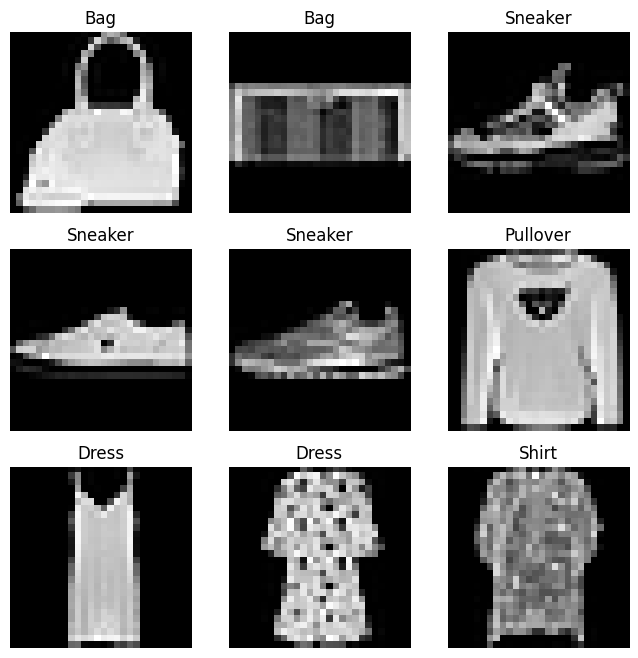

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


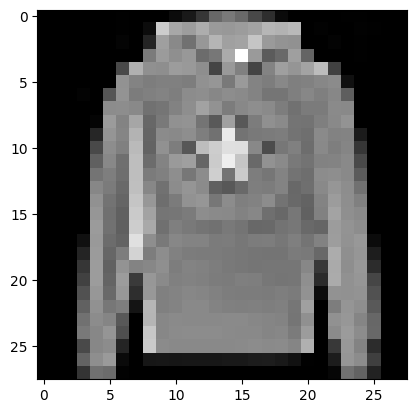

Label: Pullover


In [ ]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
label_name = list(labels_map.values())[label]
print(f"Label: {label_name}")

from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))



## Fashion MNIST using CNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split

# Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

# Test the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test set: {100 * correct / total}%')


Epoch 1/10, Loss: 0.439750461165966
Epoch 2/10, Loss: 0.27974427527964496
Epoch 3/10, Loss: 0.23445369181697812
Epoch 4/10, Loss: 0.20110733889893237
Epoch 5/10, Loss: 0.17580950569146986
Epoch 6/10, Loss: 0.15101826644893776
Epoch 7/10, Loss: 0.13153658486179895
Epoch 8/10, Loss: 0.11280601687713472
Epoch 9/10, Loss: 0.09485050246441193
Epoch 10/10, Loss: 0.0796792807766417
Accuracy on the test set: 92.09%


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


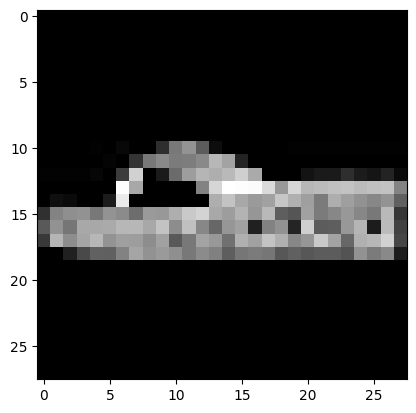

Label: Sandal


In [ ]:
import matplotlib.pyplot as plt
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
label_name = list(labels_map.values())[label]
print(f"Label: {label_name}")

## local file

/content/drive/MyDrive/archive/fashion-mnist_test.csv
/content/drive/MyDrive/archive/t10k-labels-idx1-ubyte
/content/drive/MyDrive/archive/fashion-mnist_train.csv
/content/drive/MyDrive/archive/t10k-images-idx3-ubyte
/content/drive/MyDrive/archive/train-labels-idx1-ubyte
/content/drive/MyDrive/archive/train-images-idx3-ubyte


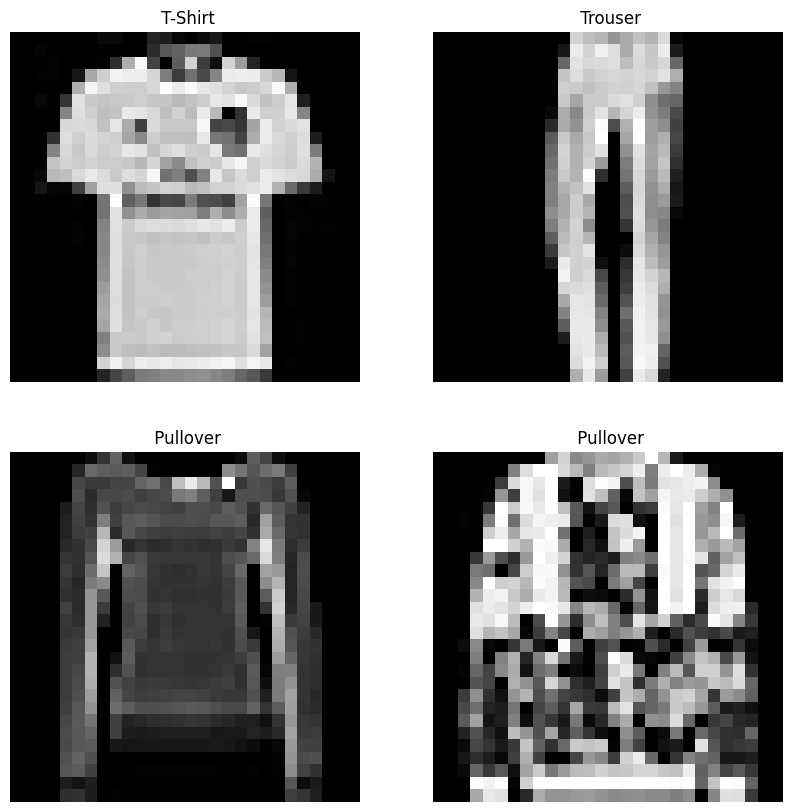

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
test = pd.read_csv('/content/drive/MyDrive/archive/fashion-mnist_test.csv')
train = pd.read_csv('/content/drive/MyDrive/archive/fashion-mnist_train.csv')
test.head()
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
labels = train['label'].values
fig, ax = plt.subplots(2,2, figsize=(10,10))
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(test.iloc[i*2+j,1:].values.reshape(28,28), cmap='gray')
        ax[i,j].set_title(' {}'.format(labels_map[test.iloc[i*2+j,0]]))
        ax[i,j].axis('off')

In [ ]:
X_train = train.drop('label', axis=1)
y_train = train['label']
X_test = test.drop('label', axis=1)
y_test = test['label']

print(f'Shapes:\nX_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

Shapes:
X_train: (60000, 784)
y_train: (60000,)
X_test: (10000, 784)
y_test: (10000,)


In [ ]:
X_test = X_test/255
X_train = X_train/255

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 128)               256       
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2331 (9.11 KB)
Trainable params: 2331 (9.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3442 - accuracy: 0.4272 - val_loss: 1.2296 - val_accuracy: 0.4882
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2034 - accuracy: 0.5000 - val_loss: 1.2041 - val_accuracy: 0.4993
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1905 - accuracy: 0.5093 - val_loss: 1.1939 - val_accuracy: 0.5030
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1816 - accuracy: 0.5114 - val_loss: 1.1887 - val_accuracy: 0.5042
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1758 - accuracy: 0.5141 - val_loss: 1.1842 - val_accuracy: 0.5178
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1709 - accuracy: 0.5183 - val_loss: 1.1814 - val_accuracy: 0.5172
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1695 - accuracy: 0.5166 - val_loss: 1.1766 - val_accuracy:

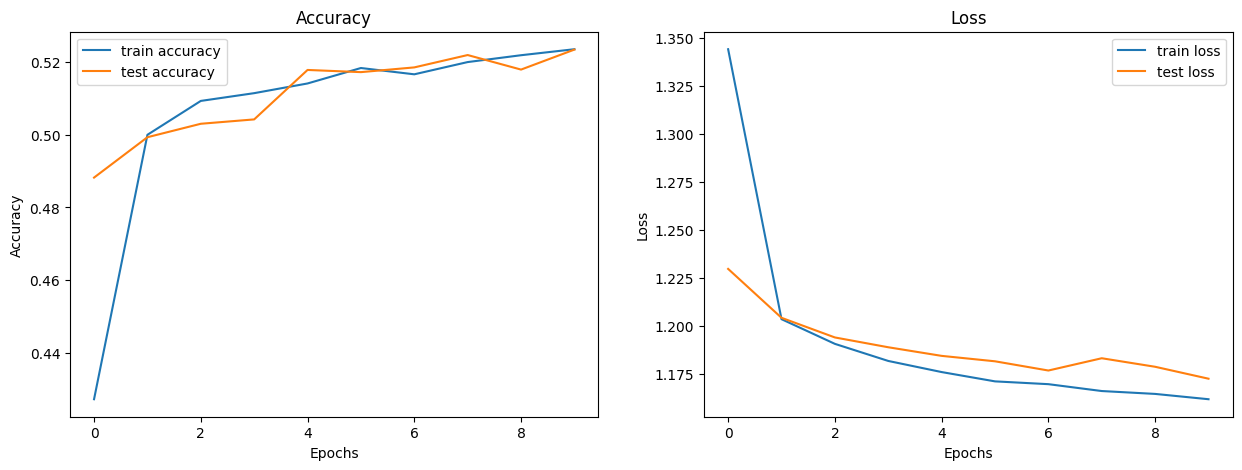

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(history.history['accuracy'], label='train accuracy')
ax[0].plot(history.history['val_accuracy'], label='test accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='train loss')
ax[1].plot(history.history['val_loss'], label='test loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss')
ax[1].legend()

313/313 [==============================] - 1s 2ms/step


<Axes: >

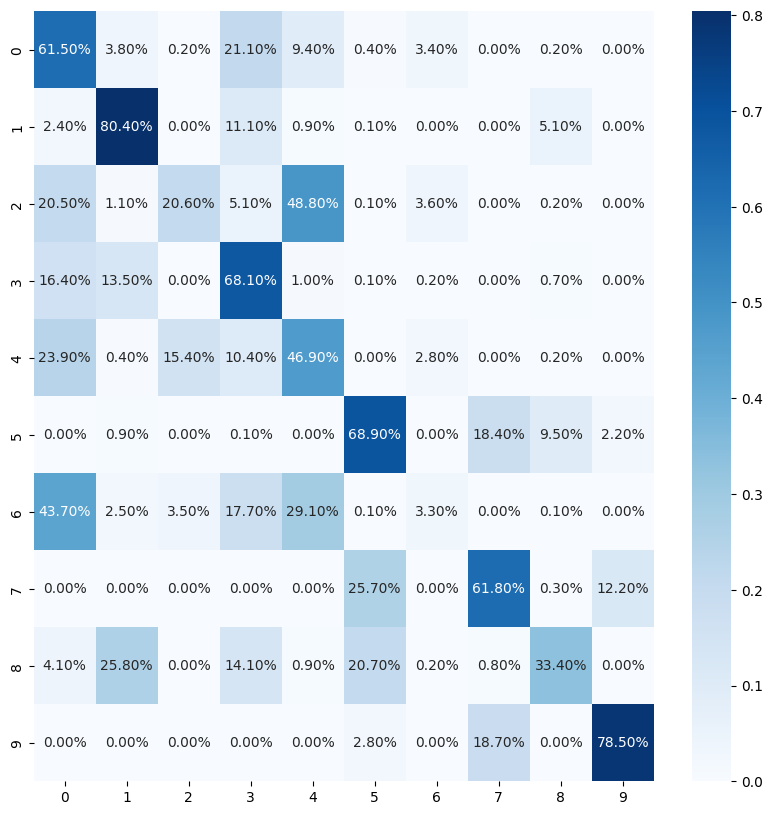

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
cm = cm/cm.sum(axis=1).reshape(-1,1)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2%')

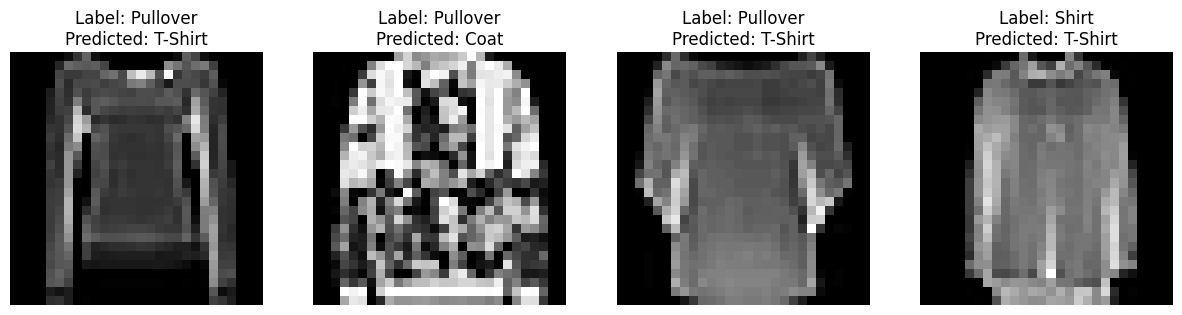

In [ ]:
misclassified_indices = np.where(y_pred != y_test)[0]

fig, ax = plt.subplots(1,4, figsize=(15,5))

for i in range(2):
    for j in range(2):
        ax[i*2+j].imshow(X_test.iloc[misclassified_indices[i*2+j]].values.reshape(28,28), cmap='gray')
        ax[i*2+j].set_title(f'Label: {labels_map[y_test.iloc[misclassified_indices[i*2+j]]]}\nPredicted: {labels_map[y_pred[misclassified_indices[i*2+j]]]}')
        ax[i*2+j].axis('off')

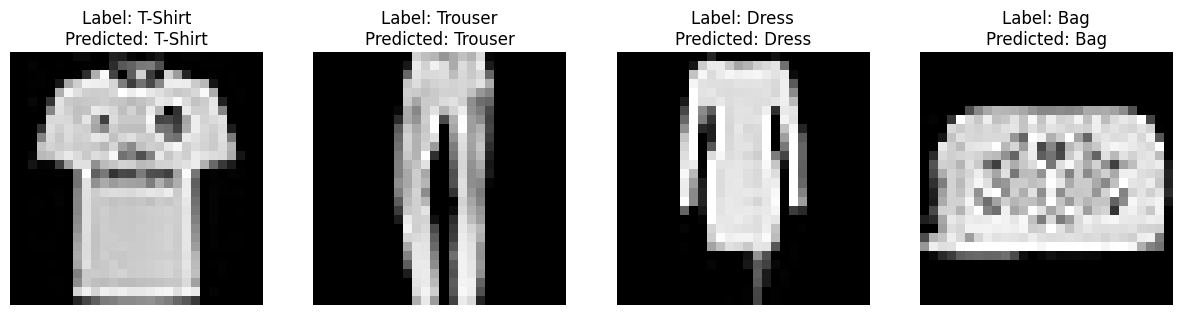

In [ ]:
indices = np.where(y_pred == y_test)[0]

fig, ax = plt.subplots(1,4, figsize=(15,5))

for i in range(2):
    for j in range(2):
        ax[i*2+j].imshow(X_test.iloc[indices[i*2+j]].values.reshape(28,28), cmap='gray')
        ax[i*2+j].set_title(f'Label: {labels_map[y_test.iloc[indices[i*2+j]]]}\nPredicted: {labels_map[y_pred[indices[i*2+j]]]}')
        ax[i*2+j].axis('off')